In [1]:
# Load the files

import pandas as pd
import json

prod = pd.read_csv("products.csv")
print(prod.head())

revws = pd.read_csv("reviews.csv")
print(revws.head())

users = pd.read_csv("users.csv")
print(users.head())

# Try to read if file in JSON Lines format or except load otherwise
def load_json(filepath):
    try:
        return pd.read_json(filepath, lines=True)
    except:
        with open(filepath) as f:
            return json.load(f)

# There is no need to explicitly define filepath as of same folder
jcpenny_products = load_json("./jcpenney_products.json")
jcpenny_reviews = load_json("./jcpenney_reviewers.json")

# It shows first five table values including rows and columns
print(jcpenny_products.head())
print(jcpenny_reviews.head())

                            Uniq_id           SKU  \
0  b6c0b6bea69c722939585baeac73c13d  pp5006380337   
1  93e5272c51d8cce02597e3ce67b7ad0a  pp5006380337   
2  013e320f2f2ec0cf5b3ff5418d688528  pp5006380337   
3  505e6633d81f2cb7400c0cfa0394c427  pp5006380337   
4  d969a8542122e1331e304b09f81a83f6  pp5006380337   

                                          Name  \
0  Alfred Dunner® Essential Pull On Capri Pant   
1  Alfred Dunner® Essential Pull On Capri Pant   
2  Alfred Dunner® Essential Pull On Capri Pant   
3  Alfred Dunner® Essential Pull On Capri Pant   
4  Alfred Dunner® Essential Pull On Capri Pant   

                                         Description  Price  Av_Score  
0  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625  
1  Youll return to our Alfred Dunner pull-on capr...  41.09     3.000  
2  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625  
3  Youll return to our Alfred Dunner pull-on capr...  41.09     3.500  
4  Youll return to o

In [2]:
# Basic Data Descriptions (statistical caluculations) for each variable in a file

''' Price seems to fluctuate a lot bcz of negative and unrealistic high values... need to remove outliers
The average score of 3 shows poor customer satisfaction '''
print(prod.describe())
# Std of 1.4 shows ratings are quite spread out means customers have mixed opinions
print(revws.describe())
# Users seem to spread out geographically across all many 57 states
print(users.describe())
# Most prodcust got around 5 reviews... showing very low customer enthusiasm
print(jcpenny_products.describe())
# Around 20% of customers have not reviewed products at all
print(jcpenny_reviews.describe())

              Price     Av_Score
count   5816.000000  7982.000000
mean     144.776618     2.988683
std      499.223719     0.911673
min      -65.270000     1.000000
25%       40.700000     2.500000
50%       58.010000     3.000000
75%       87.020000     3.500000
max    17122.170000     5.000000
              Score
count  39063.000000
mean       1.487648
std        1.400332
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
        Username         DOB          State
count       5000        5000           5000
unique      4999          52             57
top     dqft3311  07.08.1953  Massachusetts
freq           2         112            107
       average_product_rating  total_number_reviews
count             7982.000000           7982.000000
mean                 2.988683              4.893886
std                  0.911673              3.314284
min                  1.000000              1.000000
25%                  2.500000              

In [3]:
# Getting basic info and DataTypes for each variable

# Have some missing values
prod.info()
# Some values are 0 need to remove those as Score must fall between 1-5
revws.info()
# Gives basic info about the datasets
users.info()
jcpenny_products.info()
jcpenny_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column 

In [4]:
# Lets convert DOB from 'object' data type to 'datetime'
users['DOB'] = pd.to_datetime(users['DOB'], format='%d.%m.%Y', errors='coerce')
# Converting list_price and sale_price to 'numeric' as best fit data type
jcpenny_products['list_price'] = pd.to_numeric(jcpenny_products['list_price'], errors='coerce')
jcpenny_products['sale_price'] = pd.to_numeric(jcpenny_products['sale_price'], errors='coerce')
# Also convert DOB in jcpenny_reviews to datetime instead of 'object'
jcpenny_reviews['DOB'] = pd.to_datetime(jcpenny_reviews['DOB'], format='%d.%m.%Y', errors='coerce')

In [5]:
# We dont need to drop duplicates as we have all unqiue values for all the files including json
prod.duplicated().sum()
users.duplicated().sum()
revws.duplicated().sum()

np.int64(0)

In [6]:
prod.isna().sum()

Uniq_id           0
SKU              67
Name              0
Description     543
Price          2166
Av_Score          0
dtype: int64

In [7]:
# Remove rows having null values in SKU column as it makes no sense of products without key identifier
prod.dropna(subset=['SKU'], inplace=True)
# Fill description columns with appropriate wordings
prod['Description'].fillna('No Description is Avaliable', inplace=True)
# First need to convert the Price column to numeric type
prod['Price'] = pd.to_numeric(prod['Price'], errors='coerce')
# Fill Price with median... most occuring value (best fit here)
prod['Price'].fillna(prod['Price'].median(), inplace=True)

C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\1622946893.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prod['Description'].fillna('No Description is Avaliable', inplace=True)
C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\1622946893.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [8]:
# revws.isna().sum()... having no null values
# users.isna().sum()... having no null values
jcpenny_products.isna().sum()
# jcpenny_reviews.isna().sum()... having no null values

uniq_id                      0
sku                          0
name_title                   0
description                  0
list_price                2166
sale_price                 263
category                     0
category_tree                0
average_product_rating       0
product_url                  0
product_image_urls           0
brand                        0
total_number_reviews         0
Reviews                      0
Bought With                  0
dtype: int64

In [9]:
# Fill remaining list_price NaNs with median
jcpenny_products['list_price'].fillna(jcpenny_products['list_price'].median(), inplace=True)
jcpenny_products['sale_price'].fillna(jcpenny_products['sale_price'].median(), inplace=True)

C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\485512370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jcpenny_products['list_price'].fillna(jcpenny_products['list_price'].median(), inplace=True)
C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\485512370.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [10]:
# Check if null values are removed
prod.isna().sum()

Uniq_id        0
SKU            0
Name           0
Description    0
Price          0
Av_Score       0
dtype: int64

In [11]:
# Check if null values are removed
jcpenny_products.isna().sum()

uniq_id                   0
sku                       0
name_title                0
description               0
list_price                0
sale_price                0
category                  0
category_tree             0
average_product_rating    0
product_url               0
product_image_urls        0
brand                     0
total_number_reviews      0
Reviews                   0
Bought With               0
dtype: int64

In [12]:
# Remove negative and extreme high price values for effective results

# Average product price is $60 with more than 3/4th of the products under afforadble price range
prod = prod[(prod['Price'] > 0) & (prod['Price'] <= 200)]
prod.describe()

,Price,Av_Score
count,7327.000000,7327.000000
mean,60.448619,2.983940
std,28.441531,0.904384
min,8.010000,1.000000
25%,45.930000,2.500000
50%,58.010000,3.000000
75%,63.860000,3.500000
max,199.960000,5.000000


In [13]:
# Reviews with 0 value rating having no sense

# Std of 1.2 shows ratings are quite spread out means customers have mixed opinions.. with 75% of score as 3
revws = revws[revws['Score'] > 0]
revws.describe()

,Score
count,27798.000000
mean,2.090510
std,1.222816
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


In [14]:
# It shows almost all states are covered with Massachusetts having most number of users

users.describe()

,DOB
count,5000
mean,1975-10-28 03:53:16.800000
min,1950-08-08 00:00:00
25%,1962-08-05 00:00:00
50%,1975-08-02 00:00:00
75%,1988-07-29 00:00:00
max,2001-07-26 00:00:00


In [15]:
# Customer feedback is poor with less reviews and moderate rating...

# Need to remove outliers for both list_price (original one) and sale_price (discounted price) and keep original values
jcpenny_products = jcpenny_products[(jcpenny_products['list_price'].between(
    0, 200)) & (jcpenny_products['sale_price'].between(0, 200))]
jcpenny_products.describe()

,list_price,sale_price,average_product_rating,total_number_reviews
count,7184.000000,7184.000000,7184.000000,7184.000000
mean,60.578604,40.577260,2.987667,4.895045
std,28.952833,28.785117,0.906570,3.291763
min,8.010000,3.610000,1.000000,1.000000
25%,44.930000,21.740000,2.500000,2.000000
50%,58.010000,33.830000,3.000000,5.000000
75%,65.270000,49.660000,3.500000,8.000000
max,199.960000,199.830000,5.000000,23.000000


In [16]:
# Customers mean age is around 50 showing targeted audiance is middle to older age rather than Gen z/ youngsters

jcpenny_reviews.describe()

,DOB
count,5000
mean,1975-10-28 03:53:16.800000
min,1950-08-08 00:00:00
25%,1962-08-05 00:00:00
50%,1975-08-02 00:00:00
75%,1988-07-29 00:00:00
max,2001-07-26 00:00:00


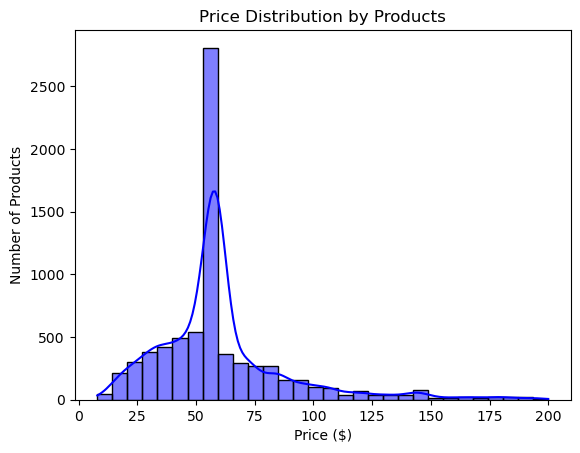

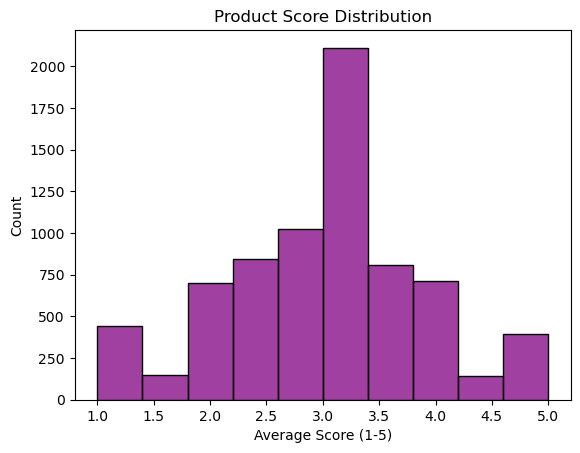

In [17]:
# Visualize how product prices are spread to check if JC Penney mainly sells low or mid-range priced items
import matplotlib.pyplot as plt
import seaborn as sns

# Price Distribution (with most products having afforable price ranges for middle class customers i.e. around $60 or less)
# Split the core values into 30 equal width ranges and count product number falls into each range
sns.histplot(prod['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution by Products')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
# Show the plots
plt.show()

# Visualize Score Distribution (average score of 3 showing poor customer satisfaction)
# Split the core values into 10 equal ranges with no line
sns.histplot(prod['Av_Score'], bins=10, kde=False, color='purple')
plt.title('Product Score Distribution')
plt.xlabel('Average Score (1-5)')
plt.ylabel('Count')
plt.show()

Average Users' Age: 49.7612


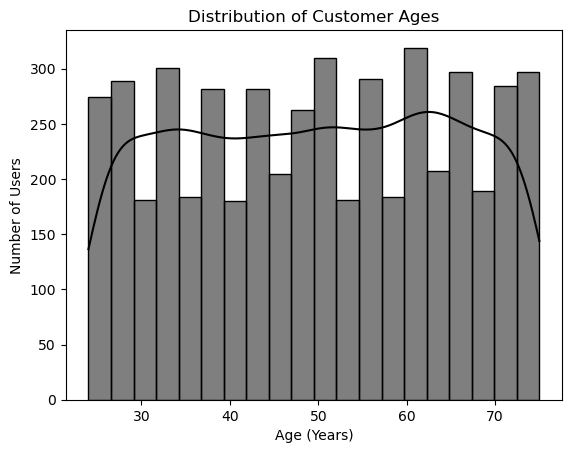

C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\1463503674.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values, y=state_counts.index, palette='crest')


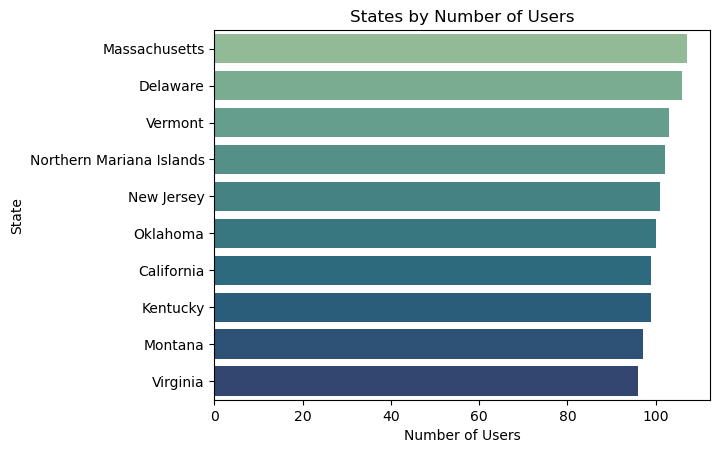

" If want to compute 'All States by Customer Counts'\nstate_counts = users['State'].value_counts()\nplt.figure(figsize=(11, 12))\nsns.barplot(x=state_counts.values, y=state_counts.index, palette='crest')\nplt.title('States by Number of Users')\nplt.xlabel('Number of Users')\nplt.ylabel('State')\nplt.show() "

In [18]:
# Import date to convert the data type
from datetime import date

# Subtract DOB from the current year to estimate each user's age
# Handle missing values safely using pd.notnull(x)
users['Age'] = users['DOB'].apply(lambda x: (
    date.today().year - x.year) if pd.notnull(x) else None)

# Average age of users
print("Average Users' Age:", users['Age'].mean())

# Distribution of Customer Ages (best for understanding your potential customer)
# 'bins=20' divides ages into 20 ranges, and 'kde=True' adds a smooth density curve
sns.histplot(users['Age'], bins=20, kde=True, color='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Users')
plt.show()

# Most common states by limiting them to 10
state_counts = users['State'].value_counts().head(10)
sns.barplot(x=state_counts.values, y=state_counts.index, palette='crest')
plt.title('States by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('State')
plt.show()

''' If want to compute 'All States by Customer Counts'
state_counts = users['State'].value_counts()
plt.figure(figsize=(11, 12))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='crest')
plt.title('States by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('State')
plt.show() '''

C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\4067990524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Name', data=high_price, palette='Reds_r')


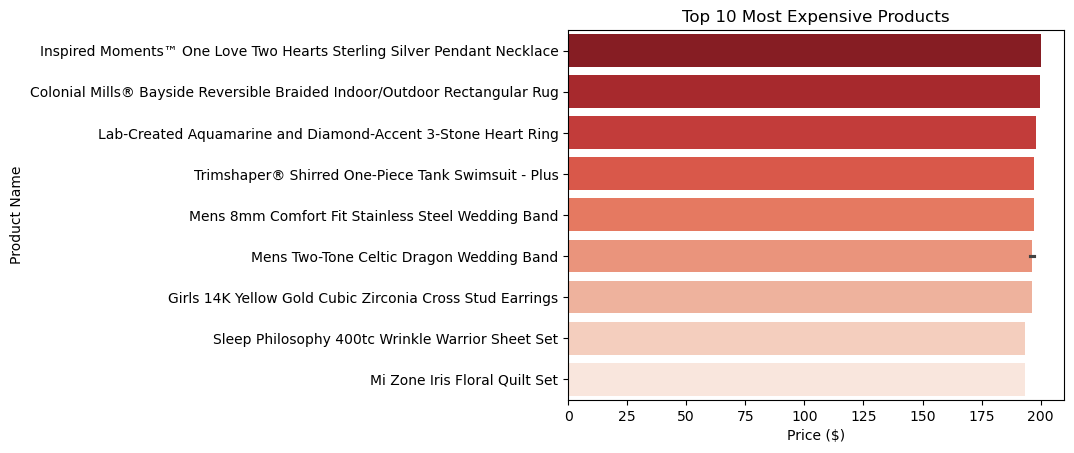

C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\4067990524.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Name', data=low_price, palette='Blues')


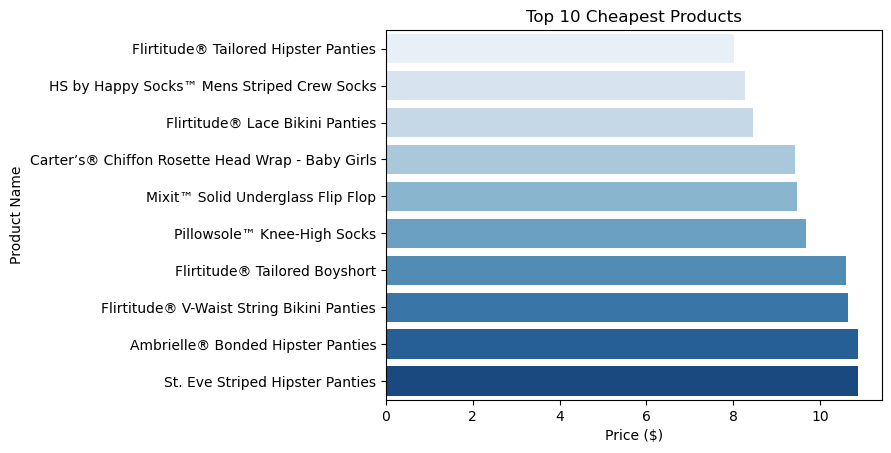

In [19]:
# Top 10 Most Expensive Products (sorted by high to low price values based on Product)

# Luxury items like Jewelry and home goods have high price
high_price = prod[['Name', 'Price']].sort_values(by='Price', ascending=False).head(10)
# Creating a barplot for better readability
sns.barplot(x='Price', y='Name', data=high_price, palette='Reds_r')
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Price ($)')
plt.ylabel('Product Name')
# Show the graph
plt.show()

# Top 10 Cheapest Products (sorted by low to high price values based on Product)

# Panties, t-shirts and socks are basic necessities so falls within low price range 
low_price = prod[['Name', 'Price']].sort_values(by='Price', ascending=True).head(10)
# Creating a barplot with blue color
sns.barplot(x='Price', y='Name', data=low_price, palette='Blues')
plt.title('Top 10 Cheapest Products')
plt.xlabel('Price ($)')
plt.ylabel('Product Name')
# Display the plot
plt.show()

Total Unique brands: 661
Total Unique categories: 1058


C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\484664814.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='Blues_r')


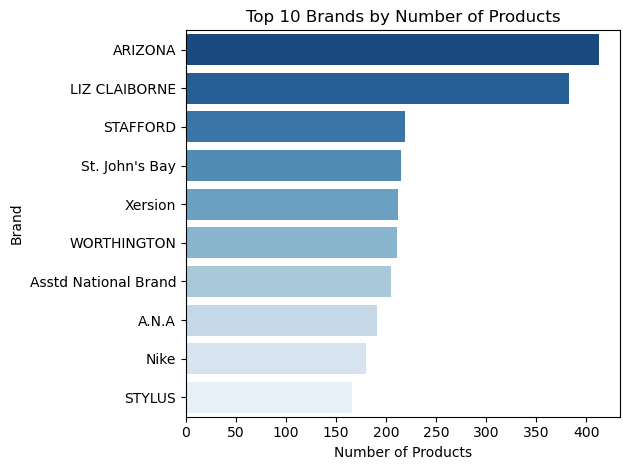

C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\484664814.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_brand_rating.values, y=avg_brand_rating.index, palette='mako')


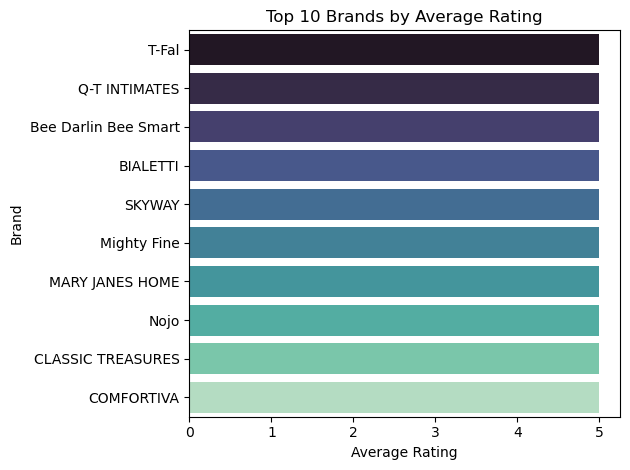

C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\484664814.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price.values, y=brand_price.index, palette='viridis')


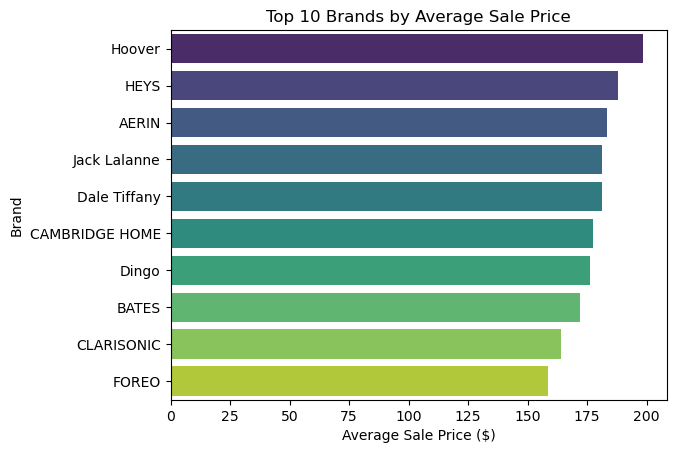

In [20]:
# Displaying unique brands and categories (to know the business diversity)
import matplotlib.pyplot as plt
import seaborn as sns
print("Total Unique brands:", jcpenny_products['brand'].nunique())
print("Total Unique categories:", jcpenny_products['category'].nunique())

# Top 10 brands by the number of products (analysing brand presence)
top_brands = jcpenny_products['brand'].value_counts().head(10)
# Command to barplot
sns.barplot(x=top_brands.values, y=top_brands.index, palette='Blues_r')
plt.title('Top 10 Brands by Number of Products') # Set Title
plt.xlabel('Number of Products') # Label x-axis
plt.ylabel('Brand') # Label y-axis
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

# Calculating top 10 brands with highest average product rating (best for identifying premium brands/ marketing focus)
avg_brand_rating = jcpenny_products.groupby('brand')['average_product_rating'].mean().sort_values(ascending=False).head(10)
# Write plot command
sns.barplot(x=avg_brand_rating.values, y=avg_brand_rating.index, palette='mako')
plt.title('Top 10 Brands by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


# Compute average sale price for each brand
brand_price = jcpenny_products.groupby(
    'brand')['sale_price'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=brand_price.values, y=brand_price.index, palette='viridis')
plt.title('Top 10 Brands by Average Sale Price')
plt.xlabel('Average Sale Price ($)')
plt.ylabel('Brand')
plt.show()

                                              Review  Score  Sentiment
0  You never have to worry about the fit...Alfred...      2      0.575
1  Good quality fabric. Perfect fit. Washed very ...      1      0.575
2  I do not normally wear pants or capris that ha...      2      0.281
4  This product is very comfortable and the fabri...      3      0.360
5  I did not like the fabric. It is 100% polyeste...      2      0.000


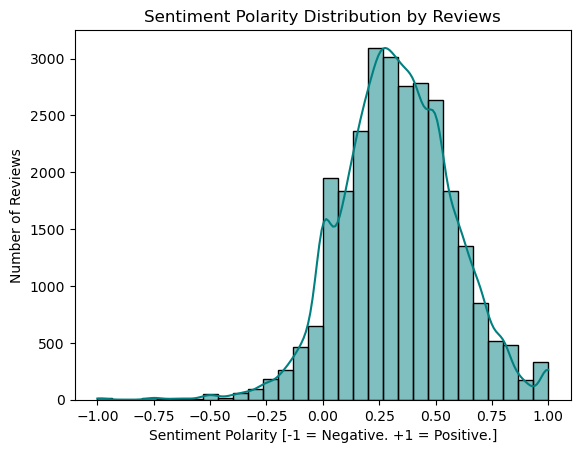

In [21]:
# Import Textblob for sentiment analysis 
from textblob import TextBlob

# Calculate sentiment polarity for each review
# lambda function helps calculate sentiment polarity score
revws['Sentiment'] = revws['Review'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity)

# Show first few results to confirm
print(revws[['Review', 'Score', 'Sentiment']].head())
# Plot the distribution across all reviews
sns.histplot(revws['Sentiment'], bins=30, color='teal', kde=True)
plt.title('Sentiment Polarity Distribution by Reviews')
plt.xlabel('Sentiment Polarity [-1 = Negative. +1 = Positive.]')
plt.ylabel('Number of Reviews')
# Display the plot
plt.show()

In [22]:
# Top best reviews by State and Avg_Score

''' Group by Username and State to find how many reviews each user gave
and what their average review score is '''

# This merge statement allows us to group each reviewer's state information by their reviews
merge_reviews = pd.merge(revws, users, on='Username', how='left')
# It aggregates mean and count for each users' score and groupby it with their username and state
review_stats = merge_reviews.groupby(['Username', 'State'])[
    'Score'].agg(['count', 'mean']).reset_index()
review_stats.rename(columns={'count': 'Reviews',
                    'mean': 'Avg_Score'}, inplace=True)
# Sort based on the most active users (limit to 10)
top_reviewers = review_stats.sort_values(
    by='Reviews', ascending=False).head(10)
print(top_reviewers)

      Username           State  Reviews  Avg_Score
2129  lfmw2441         Vermont       16   2.062500
2038  kprr1423          Oregon       14   2.000000
4902  zrbr3242            Guam       14   2.000000
232   bezo2134        Arkansas       14   1.785714
3369  rryf2412   West Virginia       14   2.357143
4376  wtzb3111       Wisconsin       13   2.153846
991   ffjj4423  North Carolina       13   2.000000
353   bueu3414      California       13   2.307692
2023  knuy4424   Massachusetts       13   2.615385
392   bzgw3443      Washington       13   1.846154


C:\Users\Muhammad imran\AppData\Local\Temp\ipykernel_12056\1076698255.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_reviews.index, y=age_reviews.values, palette='crest')


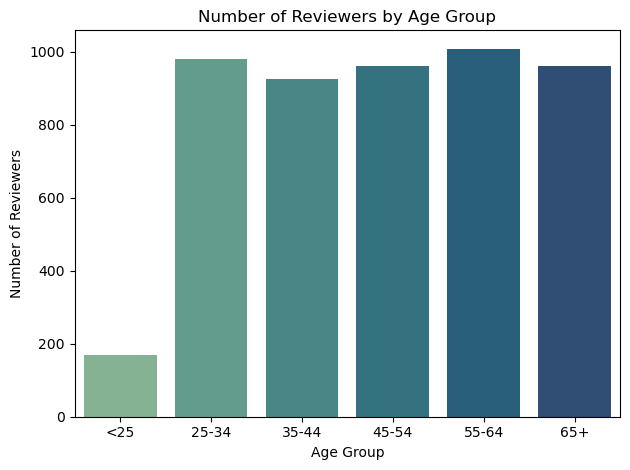

In [23]:
from datetime import date

# Merge age information from users dataset into the reviews dataset
# This allows us to analyse reviews by age
users['Age'] = users['DOB'].apply(lambda x: (
    date.today().year - x.year) if pd.notnull(x) else None)
jcpenny_reviews = pd.merge(
    jcpenny_reviews, users[['Username', 'Age']], on='Username', how='left')
# Define age groups for segmentation
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
jcpenny_reviews['Age_Group'] = pd.cut(
    jcpenny_reviews['Age'], bins=bins, labels=labels)
# Count the number of reviewers in each age group
age_reviews = jcpenny_reviews['Age_Group'].value_counts().sort_index()

sns.barplot(x=age_reviews.index, y=age_reviews.values, palette='crest')
plt.title('Number of Reviewers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Reviewers')
plt.tight_layout()
plt.show()

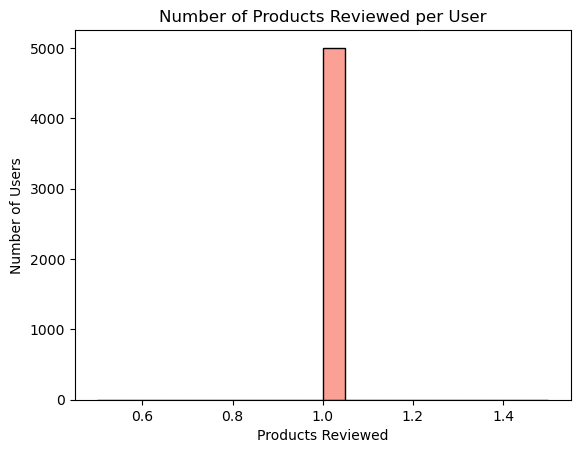

In [24]:
# Tells How Many Products Each Reviewer Reviewed

# Create the column 'Reviewed_Count' to store number of products reviewed by each user
# Convert it to an actual list using eval() and count how many items are in it
# If it's not a list, we just count it as one review
jcpenny_reviews['Reviewed_Count'] = jcpenny_reviews['Reviewed'].apply(
    lambda x: len(eval(x)) if isinstance(x, str) and x.startswith('[') else 1)
sns.histplot(jcpenny_reviews['Reviewed_Count'], bins=20, color='salmon')
plt.title('Number of Products Reviewed per User')
plt.xlabel('Products Reviewed')
plt.ylabel('Number of Users')
plt.show()

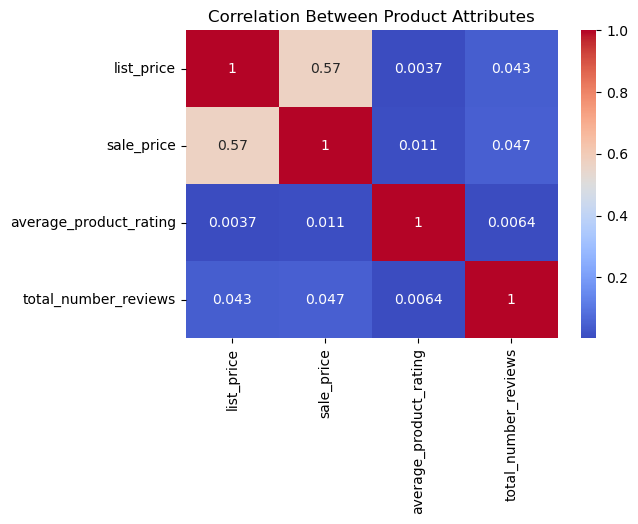

In [25]:
# HeatMap to know correlation between list_price/ sale_price & other attributes 

plt.figure(figsize=(6, 4))
sns.heatmap(
    jcpenny_products[['list_price', 'sale_price',
                      'average_product_rating', 'total_number_reviews']].corr(),  # Calculating correlation
    annot=True,  # Display correlation values on the heatmap
    cmap='coolwarm'  # Using a diverging color palette for better contrast
)
plt.title('Correlation Between Product Attributes')
plt.show()